## Processing Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn

df_final = pd.read_pickle('NBA.pkl')

In [2]:
df_final.head()

,Player,Pos_x,Team_x,Age_x,Yrs,Dollars,Guaranteed,% GTD,Avg. Salary,Free Agent,...,TRB,AST,STL,BLK,TOV,PF,PTS,PER,Team_y,GS
9,James Harden,SG,HOU,30.0,4.0,171131520.0,171131520.0,100.0,42782880.0,2023.0,...,6.400000,7.400000,1.700000,0.900000,4.500000,3.400000,34.400000,28.4,HOU,61.0
0,Russell Westbrook,PG,HOUSigned w/OKC,31.0,5.0,206794070.0,206794070.0,100.0,41358814.0,2023.0,...,11.054795,10.739726,1.945205,0.452055,4.452055,3.356164,22.945205,21.1,NaN,NaN
16,Devin Booker,SG,PHX,23.0,5.0,158253000.0,158253000.0,100.0,31650600.0,2024.0,...,4.200000,6.600000,0.700000,0.300000,3.900000,3.000000,26.100000,19.8,PHO,62.0
183,Trae Young,PG,ATL,21.0,3.0,18201240.0,18201240.0,100.0,6067080.0,2022.0,...,3.716049,8.061728,0.888889,0.185185,3.802469,1.728395,19.123457,17.0,NaN,NaN
18,LeBron James,SF,LAL,35.0,4.0,153312846.0,153312846.0,100.0,38328212.0,2022.0,...,8.454545,8.254545,1.309091,0.600000,3.581818,1.709091,27.363636,25.6,NaN,NaN


In [3]:
df_final.columns

Index(['Player', 'Pos_x', 'Team_x', 'Age_x', 'Yrs', 'Dollars', 'Guaranteed',
       '% GTD', 'Avg. Salary', 'Free Agent', 'Year', 'Contract Ends', 'Pos_y',
       'Age_y', 'G', 'FG%', '3P%', '2P%', 'eFG%', 'FT%', 'MP', 'ORB', 'DRB',
       'FG', 'FGA', '3P', '3PA', '2P', '2PA', 'FT', 'FTA', 'TRB', 'AST', 'STL',
       'BLK', 'TOV', 'PF', 'PTS', 'PER', 'Team_y', 'GS'],
      dtype='object')

In [4]:
#Drop Unnecessary Categorical columns. Also Dollars & Guaranteed to avoid Data Leakage
df_final = df_final.drop(columns=['Player', 'Pos_x', 'Team_x', 'Pos_y', 'Age_y', 'Team_y', 'Dollars', 'Guaranteed'])

#Rename Age column
df_final.rename(columns={'Age_x':'Age'}, inplace=True)

df_final.columns

Index(['Age', 'Yrs', '% GTD', 'Avg. Salary', 'Free Agent', 'Year',
       'Contract Ends', 'G', 'FG%', '3P%', '2P%', 'eFG%', 'FT%', 'MP', 'ORB',
       'DRB', 'FG', 'FGA', '3P', '3PA', '2P', '2PA', 'FT', 'FTA', 'TRB', 'AST',
       'STL', 'BLK', 'TOV', 'PF', 'PTS', 'PER', 'GS'],
      dtype='object')

In [5]:
#Check to make sure all columns are numeric
df_final.dtypes

Age              float64
Yrs              float64
% GTD            float64
Avg. Salary      float64
Free Agent       float64
Year               int64
Contract Ends    float64
G                float64
FG%              float64
3P%              float64
2P%              float64
eFG%             float64
FT%              float64
MP               float64
ORB              float64
DRB              float64
FG               float64
FGA              float64
3P               float64
3PA              float64
2P               float64
2PA              float64
FT               float64
FTA              float64
TRB              float64
AST              float64
STL              float64
BLK              float64
TOV              float64
PF               float64
PTS              float64
PER              float64
GS               float64
dtype: object

In [6]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 405 entries, 9 to 412
Data columns (total 33 columns):
Age              405 non-null float64
Yrs              405 non-null float64
% GTD            405 non-null float64
Avg. Salary      405 non-null float64
Free Agent       405 non-null float64
Year             405 non-null int64
Contract Ends    405 non-null float64
G                391 non-null float64
FG%              391 non-null float64
3P%              391 non-null float64
2P%              391 non-null float64
eFG%             391 non-null float64
FT%              391 non-null float64
MP               391 non-null float64
ORB              391 non-null float64
DRB              391 non-null float64
FG               391 non-null float64
FGA              391 non-null float64
3P               391 non-null float64
3PA              391 non-null float64
2P               391 non-null float64
2PA              391 non-null float64
FT               391 non-null float64
FTA              391 no

In [7]:
X = df_final.drop('Avg. Salary', axis=1).values
y = df_final['Avg. Salary'].values

## Imputing missing data in a ML Pipeline

In [8]:
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.impute import SimpleImputer

# Setup the pipeline steps: steps
steps = [('imputation', SimpleImputer(missing_values=np.nan, strategy='mean')),
         ('scaler', StandardScaler()),
         ('rf', RandomForestRegressor())]

# Create the pipeline: pipeline 
pipeline = Pipeline(steps)

# Create train and test sets (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Hyperameters GridSearchCV

In [10]:
param_grid = {
    'rf__n_estimators': [100, 200, 300, 1000],
    'rf__max_depth': [5, 8, 15, 25, 30],
    'rf__min_samples_split': [8, 10, 12],
    'rf__min_samples_leaf': [3, 4, 5] 
}


# Instantiate the grid search model
grid_search = GridSearchCV(estimator = pipeline, param_grid = param_grid, 
                          cv = 5, n_jobs = -1, verbose = 3)
# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# best parameters
grid_search.best_params_

Fitting 5 folds for each of 180 candidates, totalling 900 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   10.8s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 504 tasks      | elapsed:  5.8min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  9.7min
[Parallel(n_jobs=-1)]: Done 900 out of 900 | elapsed: 11.1min finished


{'rf__max_depth': 8,
 'rf__min_samples_leaf': 3,
 'rf__min_samples_split': 8,
 'rf__n_estimators': 200}

In [11]:
y_pred = grid_search.predict(X_test)

# RMSLE (Root Mean Squared Logarithmic Error) function
def rmsle(y_test, y_pred):
    return np.sqrt(metrics.mean_squared_log_error(y_test, y_pred))

# Create function to evaluate our model
def show_scores(model):
    train_preds = model.predict(X_train)
    test_preds = model.predict(X_test)
    scores = {"Training MAE": metrics.mean_absolute_error(y_train, train_preds),
              "Valid MAE": metrics.mean_absolute_error(y_test, test_preds),
              "Training RMSLE": rmsle(y_train, train_preds),
              "Valid RMSLE": rmsle(y_test, test_preds)}
    return scores

In [12]:
show_scores(grid_search)

{'Training MAE': 1569408.690718311,
 'Valid MAE': 3626434.890206261,
 'Training RMSLE': 0.351825305462326,
 'Valid RMSLE': 0.5590356246551744}

The mean absolute percentage error (MAPE) is a statistical measure of how accurate a forecast system is. It measures this accuracy as a percentage.

In [13]:
# Function to evaluate model's MAPE
def evaluate(model, X_test, y_test):
    errors = abs(y_pred - y_test)
    mape = 100 * np.mean(errors / y_test)
    print('Model Performance')
    print('Mean Absolute Percentage Error = {:0.2f}%.'.format(mape))
    
    return mape

In [14]:
best_grid = grid_search.best_estimator_
grid_accuracy = evaluate(best_grid, X_test, y_test)

Model Performance
Mean Absolute Percentage Error = 53.70%.


## Model Predictions

In [15]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
0,1662060.0,4.268262e+06
1,12000835.0,1.466692e+07
2,31957493.0,5.768466e+06
3,17000450.0,1.595685e+07
4,8000000.0,1.665903e+07
...,...,...
76,33333333.0,2.383343e+07
77,14545000.0,1.150421e+07
78,1532398.0,3.501691e+06
79,1270792.0,3.876008e+06


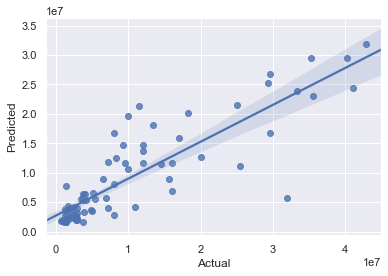

In [16]:
import seaborn as sns

sns.set(color_codes=True)
ax = sns.regplot(x="Actual", y="Predicted", data=df)

This linear line across the plot is the best available fit for the trend of the Predicted Average Salary (Avg. Salary) with respect to the Actual Avg. Salary. The data points far away from the line are the outliers.
Looking at this plot, we may say that if the actual average salary is around \\$20,000,000, then the predicted average salary is around $15,000,000.

## Feature Importance

Feature importance seeks to figure out which different attributes of the data were most important when it comes to predicting the target variable (Avg. Salary).

In [49]:
# Showing feature importance
model = grid_search.best_estimator_.named_steps['rf'].feature_importances_
model

array([0.07140504, 0.02976298, 0.00335454, 0.00580926, 0.00331897,
       0.04006459, 0.00967999, 0.00410911, 0.00383307, 0.00608129,
       0.00345778, 0.00462063, 0.48562433, 0.00311879, 0.00808822,
       0.01280589, 0.0120529 , 0.00387846, 0.00487444, 0.01507897,
       0.01466595, 0.04742701, 0.04602998, 0.00444682, 0.00959561,
       0.00593813, 0.00508325, 0.03160776, 0.00763828, 0.01750695,
       0.07656171, 0.00247931])

Feature: 0, Score: 0.07141
Feature: 1, Score: 0.02976
Feature: 2, Score: 0.00335
Feature: 3, Score: 0.00581
Feature: 4, Score: 0.00332
Feature: 5, Score: 0.04006
Feature: 6, Score: 0.00968
Feature: 7, Score: 0.00411
Feature: 8, Score: 0.00383
Feature: 9, Score: 0.00608
Feature: 10, Score: 0.00346
Feature: 11, Score: 0.00462
Feature: 12, Score: 0.48562
Feature: 13, Score: 0.00312
Feature: 14, Score: 0.00809
Feature: 15, Score: 0.01281
Feature: 16, Score: 0.01205
Feature: 17, Score: 0.00388
Feature: 18, Score: 0.00487
Feature: 19, Score: 0.01508
Feature: 20, Score: 0.01467
Feature: 21, Score: 0.04743
Feature: 22, Score: 0.04603
Feature: 23, Score: 0.00445
Feature: 24, Score: 0.00960
Feature: 25, Score: 0.00594
Feature: 26, Score: 0.00508
Feature: 27, Score: 0.03161
Feature: 28, Score: 0.00764
Feature: 29, Score: 0.01751
Feature: 30, Score: 0.07656
Feature: 31, Score: 0.00248


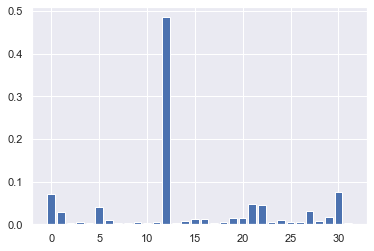

In [50]:
import matplotlib.pyplot as plt

# Display feature importance and display plot 
# Get importance
importance = model

# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
    
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [52]:
zipped = list(zip(df_final.columns, model))

# Display features importance in descending order
df1 = pd.DataFrame(zipped, columns=['Features', 'Score']).sort_values('Score', ascending=False)
df1


,Features,Score
12,FT%,0.485624
30,PTS,0.076562
0,Age,0.071405
21,2PA,0.047427
22,FT,0.046030
5,Year,0.040065
27,BLK,0.031608
1,Yrs,0.029763
29,PF,0.017507
19,3PA,0.015079


Free throw percentage (FT%) was the most important feature when it came to predicting Average Salary (Avg. Salary). Followed by points (PTS) and age (AGE).